# Merger bushes
Script to explore properties of merger trees for which there may be more than one descendant halo.
Note that precludes the use of simple pointers such as nextSibling to search over past trees - because more than one descendant may share the same halo.  Instead, as in the output from ahf_MULTIDVIR, each halo must keep its own list of progenitors.

## Preliminaries
This section reads in the data from the ahf_MULTIDVIR output file
and does some simple sanity checks.

In [14]:
# Imports.
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# Parameters.
nSnap=62
partMass=9.36393128e+08

In [3]:
# Open HDF5 file, if not already loaded
try:
    fin
except:
    fin=h5py.File('/Users/petert/data/Sussing/network.hdf5','r')

In [10]:
# Read in existing data about halos
Halos=fin['HaloCatalogue_0/Halos']
Mass=Halos['Mass']
HalosInSnap=fin['HaloCatalogue_0/HalosInSnap']
nHaloSnap=HalosInSnap[:]
nHalo=sum(nHaloSnap)

In [11]:
# Read in existing data about Descendants
NHalosDescendant=fin['Descendant_0/NHalosDescendant']
nDesc=NHalosDescendant[:] # Number of descendants for each halo.
HalosDescendant=fin['Descendant_0/HalosDescendant']
haloID=HalosDescendant['haloID']
share=HalosDescendant['share']
# Sanity checks
assert nHalo == len(nDesc)
assert sum(nDesc) == len(haloID)

In [12]:
# ahf_MULTIDVIR labels halos from 0 within each snap.
# To identify the location within the whole array, 
# we need to know the offsets of each snap.
# nHaloSnapCum provides the cumulative halo count needed to do that.
nHaloSnapCum=np.zeros(nSnap,dtype=np.int32)
nHaloSnapCum[0]=nHaloSnap[0]
for iSnap in range(1,nSnap): 
    nHaloSnapCum[iSnap]=nHaloSnapCum[iSnap-1]+nHaloSnap[iSnap]
assert nHaloSnapCum[nSnap-1] == nHalo

## Meaning of 'share' 
I want to test what "share" means.  I presume that it is the number
of particles that a halo and its descendant have in common.
This section tests that idea.

### Mass shared with descendants
The most obvious way to do that is to compare the total "share" values for each halo
with its total mass.  Some particles may be lost to the system, but the most common
outcome would be for the two totals to be proportional.


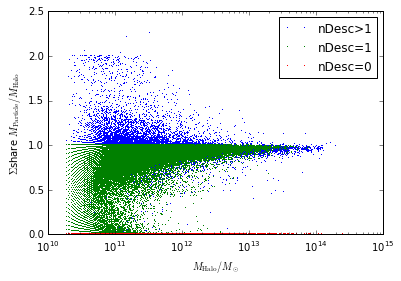

In [36]:
# Array to hold sum of 'share'd particles
shareTot=np.zeros(nHalo,dtype=np.int32)
# Loop over halos evaluating sum
iDescCum=0
for iHalo in range(nHalo):
    for iDesc in range(nDesc[iHalo]):
        shareTot[iHalo]+=share[iDescCum]
        iDescCum+=1
# Check that we used all entires in share exactly once:
assert iDescCum==len(share)
# In the figure that follows most points should lie on a horizontal line,
# with some points scattered low and none high.
plt.figure(1)
plt.semilogx(Mass,partMass*shareTot/Mass,',',label='nDesc>1')
plt.xlabel(r'$M_\mathrm{Halo}/M_\odot$')
plt.ylabel(r'$\Sigma$share $M_\mathrm{Particle}/M_\mathrm{Halo}$')
index=np.where(nDesc==1)
plt.semilogx(Mass[index],partMass*shareTot[index]/Mass[index],',',label='nDesc=1')
index=np.where(nDesc==0)
plt.semilogx(Mass[index],partMass*shareTot[index]/Mass[index],',',label='nDesc=0')
plt.legend()
print()